In [1]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [2]:
#pwd

In [3]:
import glob
json_files=glob.glob('/work/francisco.jimenez/RIT/Metadata/*Metadata.json',recursive = True)

import importlib
importlib.reload(sxs)
conditions=np.asarray([['BHBH',None],['Non-Precessing',None],['Eccentricity',['>=0.01','<=0.50']]])
ritcat=sxs.SXS_catalogue("/work/francisco.jimenez/RIT/Data",conditions,catalogue="RIT")

systems=np.array([ritcat.metadata(j,parameters_list=['catalog-tag','system-type','eccentricity','relaxed-mass-ratio-1-over-2',
                                                     'final-mass','final-chi','initial-bh-chi1z','initial-bh-chi2z','freq-start-22']) for j in json_files])

boolean= np.array(['e' in elist for elist in systems[:,0]])

for i in range(len(systems)):
    if 'e' in systems[:,0][i] and float(systems[:,2][i])<0.5:
        boolean[i]=True
    else:
        boolean[i]=False

ecc_prec_cases=systems[boolean]
boolean = np.array(['Precessing' not in elist for elist in ecc_prec_cases])
ecc_cases=ecc_prec_cases[boolean]
ecc_cases[:,2]=np.array([float(i[2]) for i in ecc_cases])
ecc_cases[:,3]=np.array([1/float(i[3]) for i in ecc_cases])
ecc_cases[:,4]=np.array([float(i[4]) for i in ecc_cases])
ecc_cases[:,5]=np.array([float(i[5]) for i in ecc_cases])
ecc_tags=ecc_cases[:,0]


h5_files=[glob.glob('/work/francisco.jimenez/RIT/Data/*'+j.replace(':','-')+'*',recursive = True)[0] for j in ecc_tags]


/work/kailai.wang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [4]:
import csv
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("export_folder/rit_mismatch_tseob_final/")
#filenames = find_csv_filenames("export_folder/rit_mismatch_seobhm/")

data_file_list=[]
info_file_list=[]

for name in filenames:
    if "rit_mismatch" in name:
        data_file_list.append("export_folder/rit_mismatch_tseob_final/"+name)
        #data_file_list.append("export_folder/rit_mismatch_seobhm/"+name)
    # if "rit_mismatch" in name:
    #     data_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)
        
        

for name in filenames:
    if "model" in name:
        info_file_list.append("export_folder/rit_mismatch_tseob_final/"+name)
        #info_file_list.append("export_folder/rit_mismatch_seobhm/"+name)

data_list=[]

for i in data_file_list:
    with open(i, newline='') as csvfile:
        data_read = list(csv.reader(csvfile))
        data_list.append(data_read)

print(len(data_list))



252


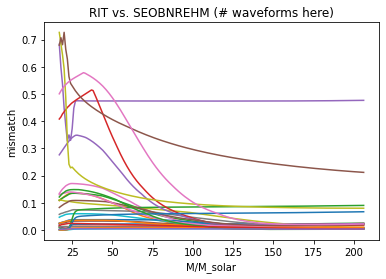

Problem List
[1, 2, 4, 6, 8, 13, 14, 15, 16, 18, 22, 25, 26]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

name_list=[]
mismatch_list=[]
mass_list=[]
problem_list=[]

for i in range(0,len(data_list)):
#for i in range(66,67):
    mismatch=[]
    mass=[]
    name=""
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='':
            mismatch_item=float(data_list[i][j][1])
            if mismatch_item>=0.1:
                # print("Problem." + str(i))
                if i not in problem_list:
                    problem_list.append(i)
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            mass.append(mass_item)
    mismatch_list.append(mismatch)
    mass_list.append(mass)
    name_list.append(data_file_list[i])

    
    
# for i in range(0,len(data_list)):
#     found=False
#     for j in ecc_cases:
#         #print(j[0])
#         if  j[0] in name_list[i]:
#             ritwavename=str(j[0])
#             #print("Found! " + str(j[0]))
#             system_type=j[1]
#             #print("system type: " + str(system_type))
#             eccentricity = j[2]
#             #print("eccentricity "+str(eccentricity))
#             relaxed_mass_ratio_1_over_2=j[3][0]
#             #print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
#             final_mass=j[4]
#             #print("final_mass: "+ str(final_mass))
#             final_chi=j[5]
#             #print("final_chi: "+ str(final_chi))
#             initial_bh_chi1z=j[6]
#             #print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
#             initial_bh_chi2z=j[7]
#             #print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
#             initial_freq=float(j[8])
#             #print("initial_freq: "+ str(initial_freq))
#             found=True
#         #if found==False:
#             #print("We tried to look for " + str(name_list[i]))
#         else:
#             c=""
#             if float(eccentricity)>=0.2: 
#                 c="red"
#             elif float(eccentricity)>0.1: 
#                 c="blue"
#             else:
#                 c="green"
#     if c=="blue":
#         print(ritwavename + " ecc estimate "+ eccentricity)
#     plt.plot(mass_list[i],mismatch_list[i],color=c)
#     plt.ylabel("mismatch")
#     plt.xlabel("M/M_solar")
#     plt.title("Eccentricity: Red: 0.2-0.5; Blue: 0.1-0.2; Green: <0.1")
#     # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
#     # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
# plt.show()
    
# for i in range(0,len(data_list)):
#     plt.plot(mass_list[i],mismatch_list[i])
#     plt.ylabel("mismatch")
#     plt.xlabel("M/M_solar")
#     # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
#     # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
# #plt.ylim(0,0.1)
# plt.show()


# name_list=[]
# mismatch_list=[]
# mass_list=[]

# for i in range(0,len(data_list)):
# #for i in range(66,67):
#     mismatch=[]
#     mass=[]
#     name=""
#     bad_acc=0
#     for j in range(1,len(data_list[i])):
#         if data_list[i][j][1]!='':
#             mismatch_item=float(data_list[i][j][1])
#             if mismatch_item>=0.1:
#                 bad_acc+=1
#             mass_item=float(data_list[i][j][0])
#             mismatch.append(mismatch_item)
#             mass.append(mass_item)
#     if bad_acc<=1:
#         mismatch_list.append(mismatch)
#         mass_list.append(mass)
#         name_list.append(data_file_list[i])

    
for i in range(0,len(name_list)):
    plt.plot(mass_list[i],mismatch_list[i])
    plt.ylabel("mismatch")
    plt.xlabel("M/M_solar")
    #print(name_list[i][66:70])
    # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
    # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
#plt.ylim(0,0.1)
plt.title("RIT vs. SEOBNREHM (# waveforms here)")
plt.show()

print("Problem List")
print(problem_list)


In [6]:
for i in problem_list:
    if int(data_file_list[i][70:74])<1282:
        print(str(i) + " " +str(data_file_list[i][70:74]))

print("number of cases: "+ str(len(problem_list)))

# print(data_file_list[10][70:74])
# print(data_file_list[11])
# print(data_file_list[14])
# print(data_file_list[15])


# print(data_file_list[14])
# print(data_file_list[19])
# print(data_file_list[38])
# print(data_file_list[62])
# print(data_file_list[91])
# print(data_file_list[175])
#1899, 1563

ValueError: invalid literal for int() with base 10: '_mas'

27


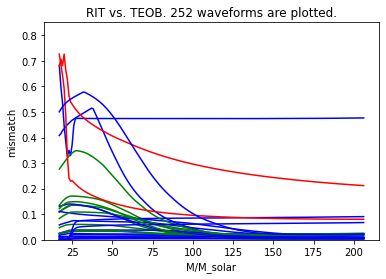

Eccentricity: Red: 0.3-0.5; Blue: 0.1-0.3; Green: <0.1
9 greens; 16 blues; 2 reds.


In [7]:
# for i in range(0,len(data_list)):
#     for j in ecc_cases:
#         if j[0] in name_list[i]:
#             ritwavename=str(j[0])
#             #print("Found! " + str(j[0]))
#             system_type=j[1]
#             #print("system type: " + str(system_type))
#             eccentricity = j[2]
#             #print("eccentricity "+str(eccentricity))
#             relaxed_mass_ratio_1_over_2=j[3][0]
#             #print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
#             final_mass=j[4]
#             #print("final_mass: "+ str(final_mass))
#             final_chi=j[5]
#             #print("final_chi: "+ str(final_chi))
#             initial_bh_chi1z=j[6]
#             #print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
#             initial_bh_chi2z=j[7]
#             #print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
#             initial_freq=float(j[8])
#             #print("initial_freq: "+ str(initial_freq))
#         c=""
#         if system_type=="Nonspinning": 
#             c="red"
#         elif system_type=="Aligned": 
#             c="blue"
#         else:
#             c="pink"
#     plt.plot(mass_list[i],mismatch_list[i],color=c)
#     plt.ylabel("mismatch")
#     plt.xlabel("M/M_solar")
#     plt.title("System Type: Red: nonspinning; Blue: Aligned")
#     # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
#     # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
# plt.show()

green_acc=0
red_acc=0
blue_acc=0

for i in range(0,len(data_list)):
    found=False
    for j in ecc_cases:
        #print(j[0])
        if  str(j[0]) in str(name_list[i]):
            #print(j[0])
            ritwavename=str(j[0])
            #print("Found! " + str(j[0]))
            system_type=j[1]
            #print("system type: " + str(system_type))
            eccentricity = j[2]
            #print("eccentricity "+str(eccentricity))
            relaxed_mass_ratio_1_over_2=j[3][0]
            #print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
            final_mass=j[4]
            #print("final_mass: "+ str(final_mass))
            final_chi=j[5]
            #print("final_chi: "+ str(final_chi))
            initial_bh_chi1z=j[6]
            #print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
            initial_bh_chi2z=j[7]
            #print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
            initial_freq=float(j[8])
            #print("initial_freq: "+ str(initial_freq))
            found=True
        #if found==False:
            #print("We tried to look for " + str(name_list[i]))
        #else:
    c=""
    if float(eccentricity)>=0.3: 
        c="red"
        red_acc+=1
    elif float(eccentricity)>0.1: 
        c="blue"
        blue_acc+=1
    else:
        c="green"
        green_acc+=1
    for j in info_file_list:
        if ritwavename in j:
            with open(j, newline='') as csvfile:
                info_read = list(csv.reader(csvfile))
                ecc_est=info_read[1][7]
                ecc_bvals=info_read[1][9]
                f_bvals=info_read[1][10]
    #print(ritwavename)
    # if c == "blue":
    #     print(ritwavename+" estimate: "+ str(np.around(float(ecc_bvals),3)) + " mismatch:" + str(np.round(float(max(mismatch_list[i])),4)))
    #if c == "red":
    plt.plot(mass_list[i],mismatch_list[i],color=c)
    plt.ylabel("mismatch")
    plt.xlabel("M/M_solar")
    plt.ylim(0,0.85)
    plt.title("RIT vs. TEOB. 252 waveforms are plotted.")
    #plt.title("Eccentricity: Red: 0.3-0.5; Blue: 0.1-0.3; Green: <0.1")
    
    # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
    # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
print(int(green_acc)+int(red_acc)+int(blue_acc))
plt.show()
print("Eccentricity: Red: 0.3-0.5; Blue: 0.1-0.3; Green: <0.1")
print(str(green_acc)+" greens; " + str(blue_acc)+" blues; " + str(red_acc)+" reds.")
# print("Looks like low eccentric cases are behaving")



Make a table

In [8]:
name_list=[]
mismatch_list=[]
mass_list=[]
max_mismatch_list=[]
max_mass_list=[]

for i in range(0,len(data_list)):
#for i in range(66,67):
    mismatch=[]
    mass=[]
    name=""
    bad_acc=0
    max_mismatch=0
    max_mass=0
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='' and float(data_list[i][j][0])<=200.:
            mismatch_item=float(data_list[i][j][1])
            if mismatch_item>=0.1:
                bad_acc+=1
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            if mismatch_item>max_mismatch:
                max_mismatch=mismatch_item
                max_mass=mass_item
            mass.append(mass_item)
                
    #if bad_acc<=1:
    # if bad_acc>=3:
    mismatch_list.append(mismatch)
    mass_list.append(mass)
    name_list.append(data_file_list[i])
    #print(max_mismatch)
    max_mismatch_list.append(max_mismatch)
    #print(max_mass)
    max_mass_list.append(max_mass)
        
        
# print(len(name_list))
# print(len(max_mass_list))
name_array=[]
mismatch_array=[]
mass_array=[]
ecc_meta_array=[]
mass_ratio_array=[]
ecc_est_array=[]
ecc_bvals_array=[]
f_bvals_array=[]
spin_array=[]

print("   name      |max mismatch| max mismatch mass |meta eccentricity| mass ratio | ecc est | ecc bvals | f bvals")
for i in range(0,len(name_list)):
    name = name_list[i]
    name = name[70:74]
    name_array.append(name)
    mismatch_array.append(np.around(max_mismatch_list[i],4))
    mass_array.append(max_mass_list[i])
    #Get meta data
    ecc=-1
    mass_ratio=-1
    for j in ecc_cases:
        # print(j[0])
        # print(name_list[i])
        if  j[0] in name_list[i]:
            ritwavename=str(j[0])
            system_type=j[1]
            ecc = j[2]
            mass_ratio=j[3]
            final_mass=j[4]
            final_chi=j[5]
            initial_bh_chi1z=j[6]
            initial_bh_chi2z=j[7]
            initial_freq=float(j[8])
            
    #spin calculation
    # goal: spin1*m1+spin2*m2 normalized 
    # m1/m2=Q and m1+m2=1
    # m1=Q/(1+Q) and m2=1/(1+Q)
    
    #looks good
    m1=float(mass_ratio)/(float(mass_ratio)+1)
    m2=1/(float(mass_ratio)+1)
    spin_array.append(m1*float(initial_bh_chi1z)+m2*float(initial_bh_chi2z))  
    ecc_meta_array.append(ecc)
    mass_ratio_array.append(np.around(float(mass_ratio),3))
    #Get bvals
    for j in info_file_list:
        if name in j:
            with open(j, newline='') as csvfile:
                info_read = list(csv.reader(csvfile))
                ecc_est=info_read[1][7]
                ecc_bvals=info_read[1][9]
                f_bvals=info_read[1][10]
                
                ecc_est_array.append(np.round(float(ecc_est),4))
                ecc_bvals_array.append(np.round(float(ecc_bvals),4))
                f_bvals_array.append(np.round(float(f_bvals),4))
                
    
    
    print(name_array[i], "   ", mismatch_array[i], "     ",  mass_array[i], "             ", 
          ecc_meta_array[i], "          ", mass_ratio_array[i], "      ",ecc_est_array[i],  "    ",
          ecc_bvals_array[i], "    " , f_bvals_array[i])
    


# I CAN SORT THE TABLE SOMEHOW
    

   name      |max mismatch| max mismatch mass |meta eccentricity| mass ratio | ecc est | ecc bvals | f bvals
_mas     0.0239       200.0               0.235            4.0        0.1641      0.0055      17.9163
_mas     0.136       26.0               0.015            2.0        0.1759      0.2502      17.3222
_mas     0.1357       26.0               0.05            1.0        0.0518      0.2498      17.8606
_mas     0.0243       200.0               0.15            1.333        0.0868      0.1906      15.7871
_mas     0.6825       17.0               0.285            1.0        0.0017      0.2579      16.7437
_mas     0.0337       38.0               0.1            1.0        0.0587      0.2765      16.3792
_mas     0.1714       25.0               0.055            4.0        0.0067      0.2793      17.7468
_mas     0.0753       26.0               0.12            1.333        0.0335      0.2763      17.5428
_mas     0.1112       17.0               0.16            4.0        0.0505      0.0

total data points27


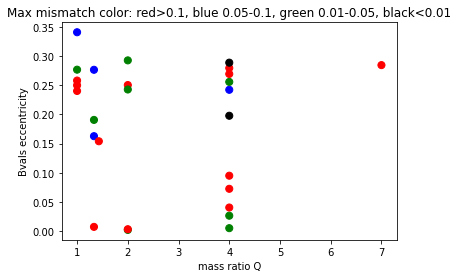

low mass ratio means higher mismatch?


In [9]:
#MASS RATIO ECCENTRICITY PLOT
print("total data points" + str(len(name_array)))
plot_data=[]
color_array=[]
for i in range(0,len(name_array)):
    if mismatch_array[i]>=0.1:
        c='red'
    elif mismatch_array[i]>=0.05:
        c='blue'
    elif mismatch_array[i]>=0.01:
        c='green'
    else:
        c='black'
    plot_data.append([mass_ratio_array[i],float(ecc_bvals_array[i])])
    color_array.append(c)
plot_data=np.array(plot_data)

plt.scatter(plot_data[:,0],plot_data[:,1],s=50,color=color_array)
plt.xlabel("mass ratio Q")
plt.ylabel("Bvals eccentricity")
plt.title("Max mismatch color: red>0.1, blue 0.05-0.1, green 0.01-0.05, black<0.01")
plt.show()
print("low mass ratio means higher mismatch?")

total data points27


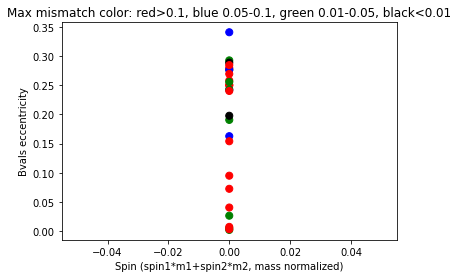

high spin means high mismatch!


In [10]:
#SPIN ECCENTRICITY PLOT

#MASS RATIO ECCENTRICITY PLOT
print("total data points" + str(len(name_array)))
plot_data=[]
color_array=[]
for i in range(0,len(name_array)):
    if mismatch_array[i]>=0.1:
        c='red'
    elif mismatch_array[i]>=0.05:
        c='blue'
    elif mismatch_array[i]>=0.01:
        c='green'
    else:
        c='black'
    plot_data.append([spin_array[i],float(ecc_bvals_array[i])])
    color_array.append(c)
plot_data=np.array(plot_data)

plt.scatter(plot_data[:,0],plot_data[:,1],s=50,color=color_array)
plt.xlabel("Spin (spin1*m1+spin2*m2, mass normalized)")
plt.ylabel("Bvals eccentricity")
plt.title("Max mismatch color: red>0.1, blue 0.05-0.1, green 0.01-0.05, black<0.01")
plt.show()
print("high spin means high mismatch!")